In [3]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# Sommerfeld (Free Electron) theory - just a little bit quantum

In 1925 Pauli discovered the exclusion principle - no two electrons can be in the same state.

This changes the 'statistics' and Fermi and Dirac together (at least in name, see [Stigler's Law of Eponymy](https://en.wikipedia.org/wiki/Stigler's_law_of_eponymy)) derived Fermi-Dirac statistics.

Sommerfeld combined Fermi-Dirac statistics with Drude's theory of metals.

Which we'll try and do ...

## Fermi-Dirac Statistics

Given a system of free electrons with chemical potential $\mu$ the probability of an energy level $E$ being occupied is

$$
n_F(\beta(E-\mu)) = \frac{1}{e^{\beta(E-\mu)} +1}
$$

where $\beta = \frac{1}{k_B T}$ controls how it changes with temperature.

Fermi-Dirac distribution
![](fermi_dirac_300K.png)

Bose-Einstein distribution
![](bose_einstein_300K.png)

<div style="background-color:LightBlue; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 
8px; padding-right: 8px; padding-top: 8px;">
<li>What is $k_B T$ at room temperaure (300 K)?</li>
<li>Plot the function for room temperature</li>
<li>Plot the function at 0K, what is this function known as?</li>
<li>What other statistical distributions have you come across?</li>
</div>

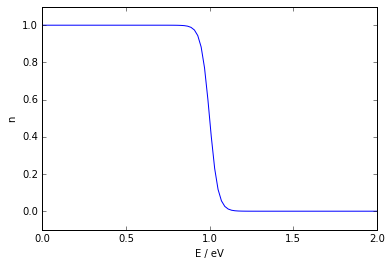

In [19]:
# fermi-dirac
E=np.linspace(0,2,100)
kT = 0.025
Ef = 1
n_F = 1/(np.exp((E-Ef)/kT)+1)
plt.plot(E,n_F);
plt.ylim(-0.1,1.1)
plt.xlabel("E / eV")
plt.ylabel("n")
plt.savefig("fermi_dirac_300K.png")

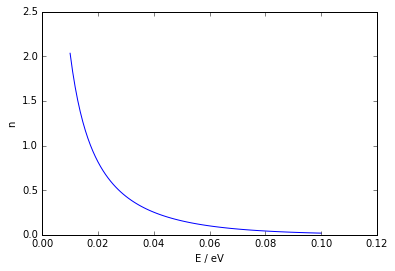

In [15]:
#bose-einstein
E=np.linspace(0.01,0.1,100)
kT = 0.025
n_B = 1/(np.exp(E/kT)-1)
plt.plot(E,n_B);
plt.xlabel("E / eV")
plt.ylabel("n")
plt.savefig("bose_einstein_300K.png")

## Electron gas in a box

Lets put our (free) electrons in a box of size $V = L^3$ - the quantum requires them to satisfy the Schroedinger equation

$$
-\frac{\hbar^2}{2m}\nabla^2 \psi = \epsilon \psi
$$

We'll use [periodic boundary conditions](https://atari.com/arcade#!/arcade/asteroids/play) (will probably only work on Windows boxes). Mathematically this requires that

$$
\psi(x+L,y+L,z+L) = \psi(x,y,z)
$$

this is basically the same as the particle in a box you did last year in quantum

<div style="background-color:LightBlue; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 
8px; padding-right: 8px; padding-top: 8px;">
<li>Do you recognise that the Shroedinger equation is both a differential equation and an eigenvalue problem?</li>
<li>What form will the solutions to the equation take?</li>
</div>

## Plane-waves

$$
\psi(x,y,z) = \frac{1}{\sqrt{V}}e^{i\mathbf{k}.\mathbf{r}}= \frac{1}{\sqrt{V}}e^{i(k_x x + k_y y + k_z z)} = \frac{1}{\sqrt{V}}e^{ik_x x} e^{ik_y y} e^{ik_z z}
$$

the $\frac{1}{\sqrt{V}}$ ensures that the wavefunctions are normalised and (quantum)

$$
k_x = \frac{2 \pi p}{L}, k_y = \frac{2 \pi q}{L}, k_z = \frac{2 \pi r}{L}, p,q,r \in \mathbb{Z}
$$

($p,q$ and $r$ taking integer values).

<div style="background-color:LightBlue; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 
8px; padding-right: 8px; padding-top: 8px;">
<li>Show that the solutions are normalised</li>
<li>Show that the solutions satisfy the Schroedinger equation</li>
</div>

The energy of the electrons is

$$
\epsilon = \frac{\hbar^2 |\mathbf{k}|^2}{2m}
$$

<div style="background-color:LightBlue; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 
8px; padding-right: 8px; padding-top: 8px;">
<li>Show that this is the energy</li>
</div>

To find the total number of electrons we add up the number of electrons in each state.

$$
N = 2 \sum_{\mathbf{k}}n_F(\beta(\epsilon(\mathbf{k}-\mu))) = 2 \frac{V}{2 \pi}^3 \int \mathbf{dk} n_F (\beta(\epsilon(\mathbf{k}-\mu)))
$$

the two comes from the number of spin states. 

**If we know the number of electrons in the system, then this defines our chemical potential.**

We'll look at how we go from the sum to the integral in the problem class - it comes up frequently.

**The fermi energy is the chemical potential at T = 0**

What does this mean? At T=0 the Fermi function becomes a step function:

![](fermi_dirac_lowK.png)

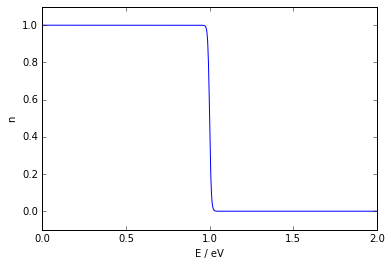

In [16]:
# fermi-dirac
E=np.linspace(0,2,1000)
kT = 0.005
Ef = 1
n_F = 1/(np.exp((E-Ef)/kT)+1)
plt.plot(E,n_F);
plt.ylim(-0.1,1.1)
plt.xlabel("E / eV")
plt.ylabel("n")
plt.savefig("fermi_dirac_lowK.png")

so our expression for the number of electrons in our periodically repeating box is given by

\begin{align}
N  & = &  2 \sum_{\mathbf{k}}n_F(\beta(\epsilon(\mathbf{k}-\mu)))\\
   & = & 2 \frac{V}{2 \pi}^3 \int \mathbf{dk} n_F (\beta(\epsilon(\mathbf{k}-\mu))) \\
   & = & 2 \frac{V}{2 \pi}^3 \int \mathbf{dk} \Theta(E_f -\epsilon(\mathbf{k} )) \\
   & = & 2 \frac{V}{2 \pi}^3 \int_{0}^{|k| < k_F}  \mathbf{dk}
\end{align}

where the fermi wavevector k_F is the wavevector at the Fermi energy

$$
E_F = \frac{\hbar^2 k_F^2}{2m}
$$

the final integral is over a ball of radius $k_F$, so we get

$$
N = 2 \frac{V}{2 \pi}^3 (\frac{4}{3}\pi k_F^3)
$$

this wavevector, $k_F$, defines a surface, called the Fermi surface that divides filled states from empty states.

The electron density is the number of electrons divided by the volume, $n = N/V$ which lead to

$$
k_F = \frac{(3 \pi^2n)^{2/3}}{2m}
$$

and 

$$
E_F = \frac{\hbar^2(3\pi^2n)^{2/3}}{2m}
$$

if we can estimate the electron density, we can estimate the Fermi energy and wavelength.

<div style="background-color:LightBlue; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 
8px; padding-right: 8px; padding-top: 8px;">
<li>Estimate the Fermi energy for copper</li>
<li>What is $k_B T$ at room temperature</li>
<li>What does this imply for the accessibility of electrons for mobility?</li>
</div>


# Electronic Heat Capacity

We can calculate the total energy (expectation value of $E$, given occupation probabilities and energy levels)

\begin{align}
E_{total} = & \frac{2V}{(2 \pi ^3)} \int \mathbf{dk} \epsilon(\mathbf{k}) n_F(\beta (\epsilon(\mathbf{k})-\mu))\\
          = & \frac{2V}{(2 \pi ^3)} \int_{0}^{\infty} 4 \pi k^2 dk \epsilon(\mathbf{k}) n_F(\beta (\epsilon(\mathbf{k})-\mu))
\end{align}

and 

\begin{align}
N = & \frac{2V}{(2 \pi ^3)} \int \mathbf{dk} n_F(\beta (\epsilon(\mathbf{k})-\mu))\\
          = & \frac{2V}{(2 \pi ^3)} \int_{0}^{\infty} 4 \pi k^2 dk n_F(\beta (\epsilon(\mathbf{k})-\mu))
\end{align}

now we change variables to those of the energy levels $\epsilon$

$$
k = \sqrt{\frac{2 \epsilon m}{\hbar^2}}
$$

which implies

$$
dk = \sqrt{\frac{m}{2 \epsilon \hbar^2}} d\epsilon
$$

and we can rewrite our integrals for $E_{\rm{total}}$ and $N$ in terms of $d \epsilon$ as

\begin{align}
E_{total} = & V \int_{0}^{\infty} d\epsilon \epsilon g(\epsilon) n_F{\beta(\epsilon - \mu)} \\
N = & V \int_{0}^{\infty} d\epsilon g(\epsilon) n_F{\beta(\epsilon - \mu)} \\
\end{align}

where we have defined

$$
g(\epsilon)d \epsilon = \frac{2}{(2\pi)^3} 4\pi k^2 dk = \frac{(2m)^{3/2}}{2 \pi^2 \hbar^3} \epsilon^{1/3} d \epsilon
$$

# What is $g(\epsilon)$?

It is called the density of states - it gives the number of energy levels that are present in an energy interval between $\epsilon$ and $\epsilon + d \epsilon$

We'll come across analogues of this multiple times - we'll talk about it more in the practical session on Thursday.

# Heat capacity

all we need to do is take the derivative of $E_{total}$ with respect to temperature ... but this is non trivial.

A back of the envelope calculation goes as follows

- Assume that $\mu$ is $E_F$
- Only molecules within $\approx k_B T$ can be excited, and they are excited by $\approx k_B T$, then

$$
E(T) \approx E(T=0) + (\text{some constant/2})[V g(E_F)(k_B T)](k_B T) + ...
$$

then $C_V = \frac{\partial E}{\partial T} \approx  \text{some constant})[V g(E_F)(k_B T)](k_B)$

and rearranging our expression for the density of states we get

$$
C_V = (\text{some constant})(\frac{3N k_B}{2})\frac{T}{T_F}
$$

so the electronic $C_V$ is temperature dependent (linear), and greatly reduced from the classical $C_V = \frac{3N k_B}{2}$ if $T_F$ is larger than $T$.

## Drude vs Somerfeld

Reduced availability of electrons explains several deficiencies in Drude's model, but still some unexplained things:

- variable sign of the Hall coefficient
- dielectric function much too simple
